In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from __init__ import list_rois, extract_samples, make_table

In [2]:
fits_path = './fits'
models_path = '.'
model_name = 'reducedlinearmodelNegBinom'
fit_format = 1
params = ['R0', 'car', 'ifr']

In [3]:
extension = ['csv', 'pkl'][fit_format]
rois = list_rois(fits_path, model_name, extension)
print("There are %d ROIs" % len(rois))

There are 163 ROIs


In [4]:
dfs = []
for roi in tqdm(rois):
    samples = extract_samples(fits_path, models_path, model_name, roi, fit_format)
    df = make_table(roi, samples, params)
    dfs.append(df)

df = pd.concat(dfs)

  0%|          | 0/163 [00:00<?, ?it/s]

Loading reducedlinearmodelNegBinom from cache...


100%|██████████| 163/163 [06:21<00:00,  2.39s/it]


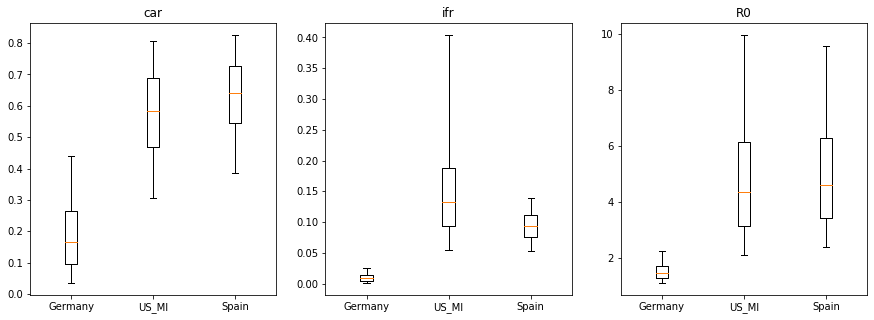

In [22]:
# The ROIs you want to plot
roi_subset = ['Germany', 'US_MI', 'Spain']

def plot_table_data(df, roi_subset):
    n_params = df.shape[1]
    fig, axes = plt.subplots(1, n_params, figsize=(n_params*5, 5))
    for i, ax in enumerate(axes.flat):
        for j, roi in enumerate(roi_subset):
            col = df.columns[i]
            boxes = [
                {
                'x': i,
                'label' : roi,
                'whislo': df.loc[(roi, 0.05), col],    # Bottom whisker position
                'q1'    : df.loc[(roi, 0.25), col],    # First quartile (25th percentile)
                'med'   : df.loc[(roi, 0.5), col],    # Median         (50th percentile)
                'q3'    : df.loc[(roi, 0.75), col],    # Third quartile (75th percentile)
                'whishi': df.loc[(roi, 0.95), col],    # Top whisker position
                'fliers': []        # Outliers
                }
            ]
            ax.bxp(boxes, positions=[j], showfliers=False)
        ax.set_title(df.columns[i])
        
plot_table_data(df, roi_subset)